In [1]:
import numpy as np
import pandas as pd
pd.options.mode.copy_on_write = True 
from ta.trend import IchimokuIndicator
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import statsmodels.api as sm
from stargazer.stargazer import Stargazer

In [2]:
spy = pd.read_csv('spy.csv')
usdjpy = pd.read_csv('usdjpy.csv')
btc = pd.read_csv('btc.csv')
gold = pd.read_csv('gold.csv')

In [3]:
def kumo_shift(df):
    """Adjusts the cloud 4 periods forward for our extended settings"""
    # Shift 'Senkou Span A' and 'Senkou Span B' forward by 4 columns
    df['Senkou Span A'] = df['Senkou Span A'].shift(4)
    df['Senkou Span B'] = df['Senkou Span B'].shift(4)
    
    # Replace empty values at the top with NaN
    df.loc[:3, ['Senkou Span A', 'Senkou Span B']] = np.nan
    
    # Drop the last 4 rows to remove additional generated values
    df = df.iloc[:-4]

## Trad Spy Clean

In [4]:
#Drop Volume
trad_spy = spy.drop(columns=['Volume'])
#Trad settings
spy_ichimoku = IchimokuIndicator(spy['High'], spy['Low'])
# Calculate Ichimoku indicators
trad_spy['Tenkan'] = spy_ichimoku.ichimoku_conversion_line()
trad_spy['Kijun'] = spy_ichimoku.ichimoku_base_line()
trad_spy['Senkou Span A'] = spy_ichimoku.ichimoku_a()
trad_spy['Senkou Span B'] = spy_ichimoku.ichimoku_b()

## Extended SPY Clean

In [5]:
josh_spy = spy.drop(columns=['Volume'])
#Ichimoku settings
spyj_ichimoku = IchimokuIndicator(spy['High'], spy['Low'], 20, 60, 120)
#Calculate Ichimoku settings
josh_spy['Tenkan'] = spyj_ichimoku.ichimoku_conversion_line()
josh_spy['Kijun'] = spyj_ichimoku.ichimoku_base_line()
josh_spy['Senkou Span A'] = spyj_ichimoku.ichimoku_a()
josh_spy['Senkou Span B'] = spyj_ichimoku.ichimoku_b()
kumo_shift(josh_spy)

## Trad FX Clean

In [6]:
#Drop Volume
trad_jpy = usdjpy.drop(columns=['Volume', 'Adj Close'])
#Trad settings
jpy_ichimoku = IchimokuIndicator(usdjpy['High'], usdjpy['Low'])
# Calculate Ichimoku indicators
trad_jpy['Tenkan'] = jpy_ichimoku.ichimoku_conversion_line()
trad_jpy['Kijun'] = jpy_ichimoku.ichimoku_base_line()
trad_jpy['Senkou Span A'] = jpy_ichimoku.ichimoku_a()
trad_jpy['Senkou Span B'] = jpy_ichimoku.ichimoku_b()

## Extedned FX Clean

In [7]:
#Drop Volume
josh_jpy = usdjpy.drop(columns=['Volume', 'Adj Close'])
#Trad settings
jpyj_ichimoku = IchimokuIndicator(usdjpy['High'], usdjpy['Low'], 20, 60, 120)
# Calculate Ichimoku indicators
josh_jpy['Tenkan'] = jpyj_ichimoku.ichimoku_conversion_line()
josh_jpy['Kijun'] = jpyj_ichimoku.ichimoku_base_line()
josh_jpy['Senkou Span A'] = jpyj_ichimoku.ichimoku_a()
josh_jpy['Senkou Span B'] = jpyj_ichimoku.ichimoku_b()
kumo_shift(josh_jpy)

## Trad BTC Clean

In [8]:
#Drop Volume
trad_btc = btc.drop(columns=['Volume', 'Adj Close'])
#Trad settings
btc_ichimoku = IchimokuIndicator(btc['High'], btc['Low'])
# Calculate Ichimoku indicators
trad_btc['Tenkan'] = btc_ichimoku.ichimoku_conversion_line()
trad_btc['Kijun'] = btc_ichimoku.ichimoku_base_line()
trad_btc['Senkou Span A'] = btc_ichimoku.ichimoku_a()
trad_btc['Senkou Span B'] = btc_ichimoku.ichimoku_b()

## Extended BTC Clean

In [9]:
#Drop Volume
josh_btc = btc.drop(columns=['Volume', 'Adj Close'])
#Trad settings
btcj_ichimoku = IchimokuIndicator(btc['High'], btc['Low'], 20, 60, 120)
# Calculate Ichimoku indicators
josh_btc['Tenkan'] = btcj_ichimoku.ichimoku_conversion_line()
josh_btc['Kijun'] = btcj_ichimoku.ichimoku_base_line()
josh_btc['Senkou Span A'] = btcj_ichimoku.ichimoku_a()
josh_btc['Senkou Span B'] = btcj_ichimoku.ichimoku_b()
kumo_shift(josh_btc)

## Trad Gold Clean

In [10]:
#Reverse
gold = gold[::-1]
gold.reset_index(drop=True, inplace=True)
#Drop Volume
trad_gold = gold.drop(columns=['Volume'])
#Rename close
trad_gold = trad_gold.rename(columns={'Close/Last' : 'Close'})
#Trad settings
gold_ichimoku = IchimokuIndicator(gold['High'], gold['Low'])
# Calculate Ichimoku indicators
trad_gold['Tenkan'] = gold_ichimoku.ichimoku_conversion_line()
trad_gold['Kijun'] = gold_ichimoku.ichimoku_base_line()
trad_gold['Senkou Span A'] = gold_ichimoku.ichimoku_a()
trad_gold['Senkou Span B'] = gold_ichimoku.ichimoku_b()

## Extended Gold Clean

In [11]:
josh_gold = gold.drop(columns=['Volume'])
#Rename close
josh_gold = josh_gold.rename(columns={'Close/Last' : 'Close'})
#Ichimoku settings
goldj_ichimoku = IchimokuIndicator(gold['High'], gold['Low'], 20, 60, 120)
#Calculate Ichimoku settings
josh_gold['Tenkan'] = goldj_ichimoku.ichimoku_conversion_line()
josh_gold['Kijun'] = goldj_ichimoku.ichimoku_base_line()
josh_gold['Senkou Span A'] = goldj_ichimoku.ichimoku_a()
josh_gold['Senkou Span B'] = goldj_ichimoku.ichimoku_b()
kumo_shift(josh_gold)

## Summary Statistics

In [12]:
#Will utilize this list for iterations of our functions later
test_set = [trad_spy, josh_spy, trad_jpy, josh_jpy, trad_btc, josh_btc, trad_gold, josh_gold]

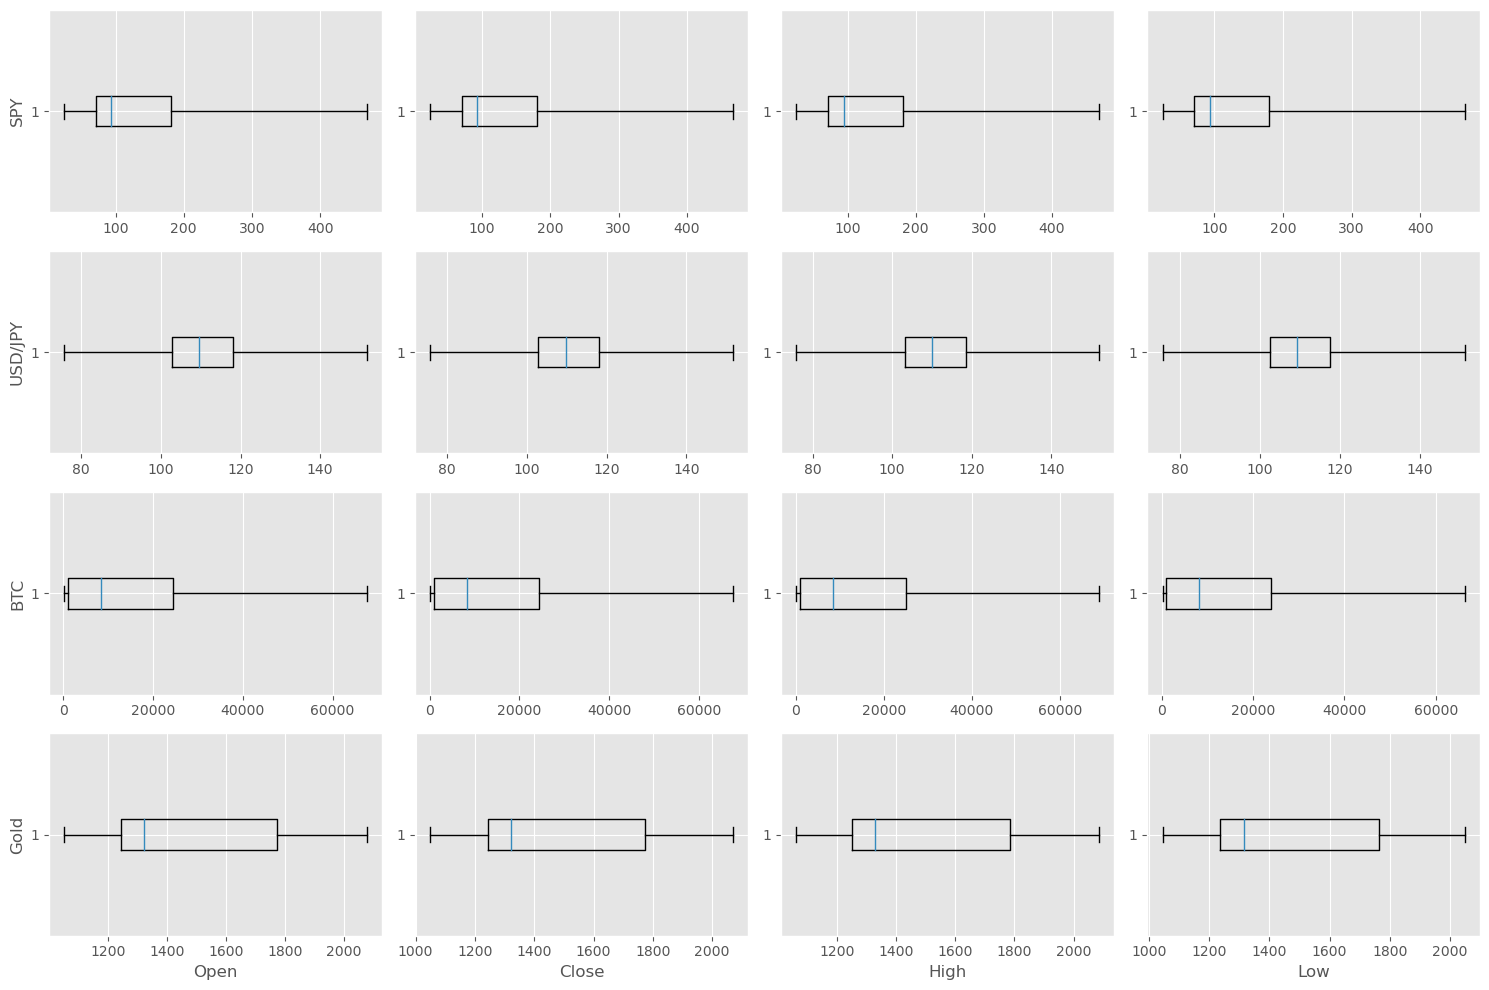

In [13]:
columns_of_interest = ['Open', 'Close', 'High', 'Low']
y_labels = ['SPY', 'USD/JPY', 'BTC', 'Gold']

# Create a figure and axis object using matplotlib
fig, axs = plt.subplots(nrows=(len(test_set)//2), ncols=len(columns_of_interest), figsize=(15, 10))

# Iterate over each DataFrame in the list
for i, df in enumerate(test_set[::2]):
    # Iterate over each column of interest
    for j, col in enumerate(columns_of_interest):
        # Create a boxplot for the current column in the current DataFrame.
        ax = axs[i, j]
        ax.boxplot(df[col], vert=False, whis=20)
        
        # Set shared y-axis labels only on the leftmost subplots
        if j == 0:
            ax.set_ylabel(y_labels[i])
        
        # Set x-axis labels for the bottom row of subplots
        if i == len(test_set)//2 - 1:
            ax.set_xlabel(col)

# Adjust layout to prevent overlap of subplots
plt.tight_layout()

# Show the plot
plt.show()

In [14]:
# Initialize dictionaries to store means and standard deviations for each column
means = {col: [] for col in columns_of_interest}
std_devs = {col: [] for col in columns_of_interest}

# Iterate over each DataFrame in test_set
for df in test_set[::2]:
    # Iterate over each column of interest
    for col in columns_of_interest:
        # Calculate mean and standard deviation of the column for the current DataFrame
        col_mean = df[col].mean()
        col_std_dev = df[col].std()
        
        # Append mean and standard deviation to the respective lists in the dictionaries
        means[col].append(col_mean)
        std_devs[col].append(col_std_dev)

# If you want to print the means and standard deviations
for col in columns_of_interest:
    print(f"Column: {col}")
    print(f"Means: {means[col]}")
    print(f"Standard Deviations: {std_devs[col]}")
    print()

Column: Open
Means: [138.91228356187332, 109.46784685080068, 14755.234566768531, 1467.4559669161085]
Standard Deviations: [108.21405090678414, 15.135539335872162, 16297.739321708703, 283.1269676344029]

Column: Close
Means: [138.92363390032708, 109.46566157697796, 14765.997971138295, 1467.4374556912169]
Standard Deviations: [108.24491918271148, 15.135447393476655, 16299.498192898049, 282.8916205940884]

Column: High
Means: [139.74658093756025, 109.88730310734104, 15099.650349705245, 1477.035880267822]
Standard Deviations: [108.83469114170444, 15.195093526074793, 16687.791864160426, 285.2329417449267]

Column: Low
Means: [137.99921825317043, 109.01309364499762, 14384.052563327572, 1457.6307207562033]
Standard Deviations: [107.55662029754134, 15.080566136030946, 15860.338592679844, 280.3667319193419]



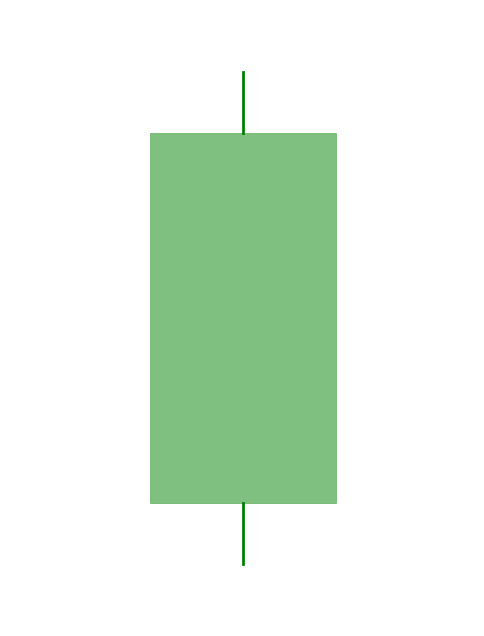

In [15]:
'''Creeating visuals for my Candle Stick Figure'''
# Create a figure and axis object using matplotlib
fig, ax = plt.subplots(figsize=(6, 8))  # Adjust figsize to make the rectangle taller than it is wide

# Draw a rectangle
rectangle = plt.Rectangle((0.3, 0.2), 0.4, 0.6, color='green', alpha=0.5)  # (x, y), width, height
ax.add_patch(rectangle)

# Draw whiskers
whisker_length = 0.1
ax.plot([0.5, 0.5], [0.8, 0.8 + whisker_length], color='green', linewidth=2)  # Top whisker
ax.plot([0.5, 0.5], [0.2, 0.2 - whisker_length], color='green', linewidth=2)  # Bottom whisker

# Set plot limits and remove axes
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

# Show the plot
plt.show()

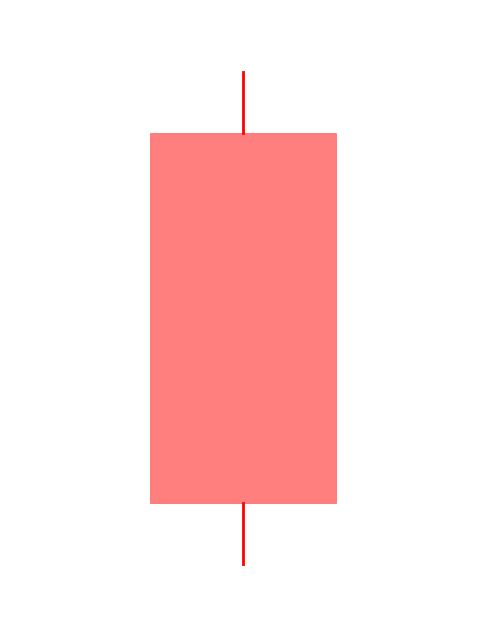

In [16]:
'''Creeating visuals for my Candle Stick Figure'''
# Create a figure and axis object using matplotlib
fig, ax = plt.subplots(figsize=(6, 8))  # Adjust figsize to make the rectangle taller than it is wide

# Draw a rectangle
rectangle = plt.Rectangle((0.3, 0.2), 0.4, 0.6, color='red', alpha=0.5)  # (x, y), width, height
ax.add_patch(rectangle)

# Draw whiskers
whisker_length = 0.1
ax.plot([0.5, 0.5], [0.8, 0.8 + whisker_length], color='red', linewidth=2)  # Top whisker
ax.plot([0.5, 0.5], [0.2, 0.2 - whisker_length], color='red', linewidth=2)  # Bottom whisker

# Set plot limits and remove axes
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

# Show the plot
plt.show()

## Event Definitions

In [17]:
def total_return_simple(asset):
    """Calculates the total return gained by buying at the first Open price and selling at the last Close price"""
    first_open = asset.iloc[0]['Open']
    last_close = asset.iloc[-1]['Close']

    total_return = ((last_close - first_open) / first_open) * 100
    print(f"Total % return gained by simple buy and hold strategy: {total_return:.2f}%")

In [18]:
def CloudtoCloud_Bull(asset):
    """Takes a df with asset values, and counts the number of success and failures of bullish edge to edge trades"""
    success = 0
    failure = 0
    in_trade = False

    for index, row in asset.iterrows():
        if row['Open'] < row['Senkou Span A'] and row['Open'] < row['Senkou Span B']:
            if row['Close'] > row['Senkou Span A']:
                in_trade = True
                while in_trade:
                    index += 1
                    if index >= len(asset):
                        break
                    if asset.loc[index, 'Close'] < asset.loc[index, 'Senkou Span A']:
                        failure += 1
                        in_trade = False
                    elif asset.loc[index, 'High'] >= asset.loc[index, 'Senkou Span B']:
                        success += 1
                        in_trade = False

    print(f"Number of Successes: {success}")
    print(f"Number of Failures: {failure}")

In [19]:
def CloudtoCloud_Bear(asset):
    """Takes a df with asset values, and counts the number of success and failures of bearish edge to edge trades"""
    success = 0
    failure = 0
    in_trade = False

    for index, row in asset.iterrows():
        if row['Open'] > row['Senkou Span A'] and row['Open'] > row['Senkou Span B']:
            if row['Close'] < row['Senkou Span A']:
                in_trade = True
                while in_trade:
                    index += 1
                    if index >= len(asset):
                        break
                    if asset.loc[index, 'Close'] > asset.loc[index, 'Senkou Span A']:
                        failure += 1
                        in_trade = False
                    elif asset.loc[index, 'Low'] <= asset.loc[index, 'Senkou Span B']:
                        success += 1
                        in_trade = False

    print(f"Number of Successes: {success}")
    print(f"Number of Failures: {failure}")

In [20]:
def CloudtoCloud_Trade(asset):
    """Enters and exits trades based on both Bull and Bear cases and calculates total return"""
    capital = 10000  # Initial capital
    position = 0  # 0 for no position, 1 for long, -1 for short
    entry_price = 0
    total_trades = 0
    successful_trades = 0

    for index, row in asset.iterrows():
        if position == 0:  # No position
            if row['Open'] < row['Senkou Span A'] and row['Open'] < row['Senkou Span B'] and row['Close'] > row['Senkou Span A']:
                # Bullish trade
                position = 1
                entry_price = row['Close']
                total_trades += 1
            elif row['Open'] > row['Senkou Span A'] and row['Open'] > row['Senkou Span B'] and row['Close'] < row['Senkou Span A']:
                # Bearish trade
                position = -1
                entry_price = row['Close']
                total_trades += 1
        elif position == 1:  # Long position
            if row['High'] >= row['Senkou Span B']:
                capital *= (row['High'] / entry_price)
                successful_trades += 1
                position = 0
            elif row['Close'] < row['Senkou Span A']:
                capital *= (row['Close'] / entry_price)  # Record loss
                position = 0
        elif position == -1:  # Short position
            if row['Low'] <= row['Senkou Span B']:
                capital *= (entry_price / row['Low'])
                successful_trades += 1
                position = 0
            elif row['Close'] > row['Senkou Span A']:
                capital *= (entry_price / row['Close'])  # Record loss
                position = 0

    final_return = (capital - 10000) / 10000 * 100  # Calculate total return percentage
    print(f"Total % return gained or lost from trading the asset: {final_return:.2f}%")
    print(f"Total number of trades: {total_trades}")
    print(f"Number of successful trades: {successful_trades}")

In [21]:
def Kijun_bounce(asset):
    """Takes an asset and returns the average returns 7, 15, and 30 days later for 'Kijun Bounce' trades"""
    close_changes = {7: [], 15: [], 30: []}
    kijun_count = 0

    for index, row in asset.iterrows():
        if row['Low'] < row['Kijun'] and row['Close'] >= row['Kijun'] and (row['Close'] > row['Senkou Span A'] and row['Close'] > row['Senkou Span B']):
            kijun_count += 1
            for distance in [7, 15, 30]:
                if index + distance < len(asset):
                    close_at_distance = asset.loc[index + distance, 'Close']
                    change = (close_at_distance - row['Close']) / row['Close'] * 100
                    close_changes[distance].append(change)
    print(f"Total Kijun Bounces: {kijun_count}")
    for distance, changes in close_changes.items():
        if changes:
            avg_change = sum(changes) / len(changes)
            print(f"Average change in Close after {distance} days: {avg_change:.2f}%")

In [22]:
def kumo_twist(asset):
    """Enter trades based on Senkou Span A and Senkou Span B and calculate total return"""
    longs = 0
    shorts = 0
    capital = 10000  # Initial capital
    entry_price = None
    position = None
    total_trades = 0

    for index, row in asset.iterrows():
        if row['Senkou Span A'] > row['Senkou Span B']:
            if position != 'long':
                if position == 'short':
                    capital *= (entry_price / row['Close'])  # Close short position
                    shorts += 1
                entry_price = row['Close']
                position = 'long'
                total_trades += 1
        elif row['Senkou Span B'] > row['Senkou Span A']:
            if position != 'short':
                if position == 'long':
                    capital *= (row['Close'] / entry_price)  # Close long position
                    longs += 1
                entry_price = row['Close']
                position = 'short'
                total_trades += 1

    # Close any open positions at the end
    if position == 'long':
        capital *= (asset.iloc[-1]['Close'] / entry_price)
        longs += 1
    elif position == 'short':
        capital *= (entry_price / asset.iloc[-1]['Close'])
        shorts += 1

    total_return = ((capital - 10000) / 10000) * 100  # Calculate total return percentage

    print(f"Total number of longs: {longs}")
    print(f"Total number of shorts: {shorts}")
    print(f"Total % return of the portfolio: {total_return:.2f}%")

## Event Tests and Figures

In [23]:
#Total returns for the buy and hold strategy of each of the 4 assets
for i in test_set[::2]:
    total_return_simple(i)

Total % return gained by simple buy and hold strategy: 1724.24%
Total % return gained by simple buy and hold strategy: 46.94%
Total % return gained by simple buy and hold strategy: 9010.82%
Total % return gained by simple buy and hold strategy: 39.07%


In [24]:
#Tests the bullish trade hitrate for each asset on both settings
for i in test_set:
    CloudtoCloud_Bull(i)

Number of Successes: 104
Number of Failures: 74
Number of Successes: 46
Number of Failures: 40
Number of Successes: 53
Number of Failures: 66
Number of Successes: 38
Number of Failures: 21
Number of Successes: 54
Number of Failures: 60
Number of Successes: 13
Number of Failures: 33
Number of Successes: 54
Number of Failures: 47
Number of Successes: 20
Number of Failures: 24


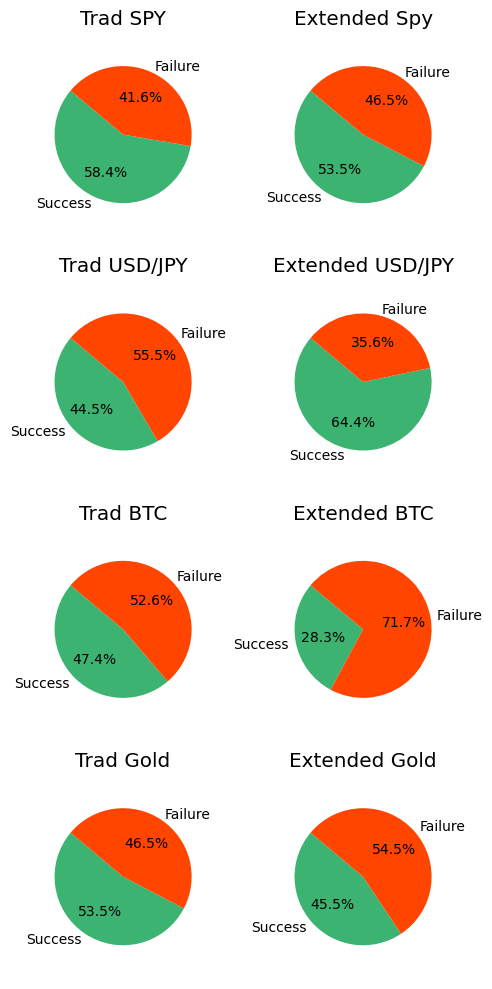

In [25]:
# Data for the pie charts
sizes_sets = [[104, 74],
              [46, 40],
              [53, 66],
              [38, 21],
              [54, 60],
              [13, 33],
              [54, 47],
              [20, 24]]

labels_sets = [['Success', 'Failure'],
               ['Success', 'Failure'],
               ['Success', 'Failure'],
               ['Success', 'Failure'],
               ['Success', 'Failure'],
               ['Success', 'Failure'],
               ['Success', 'Failure'],
               ['Success', 'Failure']]
titles = ['Trad SPY', 'Extended Spy', 'Trad USD/JPY', 'Extended USD/JPY', 
          'Trad BTC', 'Extended BTC', 'Trad Gold', 'Extended Gold']

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(5, 10))

# Iterate over each set of sizes/labels and create a pie chart
for i, (sizes, labels, title) in enumerate(zip(sizes_sets, labels_sets, titles)):
    row = i // 2  # Calculate the row index
    col = i % 2   # Calculate the column index
    axes[row, col].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors= ['mediumseagreen', 'orangered'])
    axes[row, col].set_title(title)

# Equal aspect ratio ensures that each pie chart is drawn as a circle
for ax_row in axes:
    for ax in ax_row:
        ax.axis('equal')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [26]:
#Tests the bearish trade hitrate for each asset on both settings
for i in test_set:
    CloudtoCloud_Bear(i)

Number of Successes: 153
Number of Failures: 181
Number of Successes: 55
Number of Failures: 124
Number of Successes: 71
Number of Failures: 47
Number of Successes: 35
Number of Failures: 48
Number of Successes: 66
Number of Failures: 59
Number of Successes: 26
Number of Failures: 23
Number of Successes: 51
Number of Failures: 45
Number of Successes: 23
Number of Failures: 24


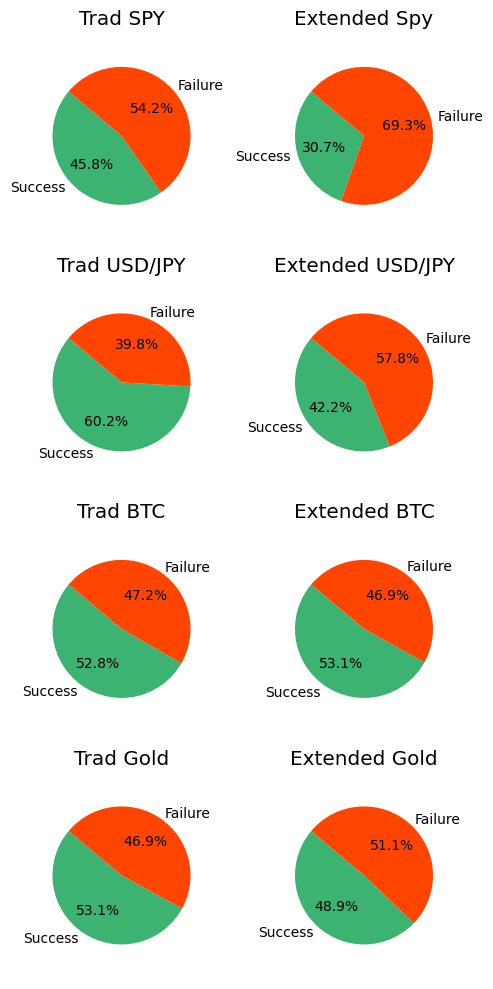

In [27]:
# Data for the pie charts
sizes_sets2 = [[153, 181],
              [55, 124],
              [71, 47],
              [35, 48],
              [66, 59],
              [26, 23],
              [51, 45],
              [23, 24]]

labels_sets2 = [['Success', 'Failure'],
               ['Success', 'Failure'],
               ['Success', 'Failure'],
               ['Success', 'Failure'],
               ['Success', 'Failure'],
               ['Success', 'Failure'],
               ['Success', 'Failure'],
               ['Success', 'Failure']]
titles2 = ['Trad SPY', 'Extended Spy', 'Trad USD/JPY', 'Extended USD/JPY', 
          'Trad BTC', 'Extended BTC', 'Trad Gold', 'Extended Gold']

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(5, 10))

# Iterate over each set of sizes/labels and create a pie chart
for i, (sizes, labels, title) in enumerate(zip(sizes_sets2, labels_sets2, titles2)):
    row = i // 2  # Calculate the row index
    col = i % 2   # Calculate the column index
    axes[row, col].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors= ['mediumseagreen', 'orangered'])
    axes[row, col].set_title(title)

# Equal aspect ratio ensures that each pie chart is drawn as a circle
for ax_row in axes:
    for ax in ax_row:
        ax.axis('equal')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [28]:
#Total portfolio strategy for bullish and bearish Edge to Edge trades
for i in test_set:
    CloudtoCloud_Trade(i)

Total % return gained or lost from trading the asset: 344.00%
Total number of trades: 444
Number of successful trades: 241
Total % return gained or lost from trading the asset: 38.77%
Total number of trades: 236
Number of successful trades: 100
Total % return gained or lost from trading the asset: 63.83%
Total number of trades: 210
Number of successful trades: 119
Total % return gained or lost from trading the asset: 51.90%
Total number of trades: 130
Number of successful trades: 72
Total % return gained or lost from trading the asset: 5747.38%
Total number of trades: 206
Number of successful trades: 108
Total % return gained or lost from trading the asset: 235.81%
Total number of trades: 90
Number of successful trades: 38
Total % return gained or lost from trading the asset: 85.42%
Total number of trades: 169
Number of successful trades: 98
Total % return gained or lost from trading the asset: 23.60%
Total number of trades: 85
Number of successful trades: 40


In [29]:
#Tests the avg returns 7, 15, and 30 days after a Kijun Bounce occurs
for i in test_set:
    Kijun_bounce(i)

Total Kijun Bounces: 360
Average change in Close after 7 days: 0.04%
Average change in Close after 15 days: 0.54%
Average change in Close after 30 days: 1.31%
Total Kijun Bounces: 198
Average change in Close after 7 days: 0.10%
Average change in Close after 15 days: 0.88%
Average change in Close after 30 days: 1.51%
Total Kijun Bounces: 252
Average change in Close after 7 days: -0.37%
Average change in Close after 15 days: -0.31%
Average change in Close after 30 days: -0.07%
Total Kijun Bounces: 168
Average change in Close after 7 days: -0.19%
Average change in Close after 15 days: -0.11%
Average change in Close after 30 days: -0.26%
Total Kijun Bounces: 122
Average change in Close after 7 days: 1.34%
Average change in Close after 15 days: 2.87%
Average change in Close after 30 days: 7.86%
Total Kijun Bounces: 50
Average change in Close after 7 days: -1.46%
Average change in Close after 15 days: 2.09%
Average change in Close after 30 days: 7.62%
Total Kijun Bounces: 95
Average change i

In [30]:
#Tests Kumo Twist Strategy
for i in test_set:
    kumo_twist(i)

Total number of longs: 84
Total number of shorts: 83
Total % return of the portfolio: 44.44%
Total number of longs: 40
Total number of shorts: 39
Total % return of the portfolio: 231.59%
Total number of longs: 85
Total number of shorts: 84
Total % return of the portfolio: -26.54%
Total number of longs: 37
Total number of shorts: 36
Total % return of the portfolio: 83.79%
Total number of longs: 43
Total number of shorts: 44
Total % return of the portfolio: 11827.28%
Total number of longs: 15
Total number of shorts: 14
Total % return of the portfolio: 10466.30%
Total number of longs: 31
Total number of shorts: 31
Total % return of the portfolio: 7.21%
Total number of longs: 15
Total number of shorts: 15
Total % return of the portfolio: -20.74%


## Logit Regression for Edge to Edge

In [31]:
# Create a DataFrame with the total number of successes and failures
e2e = {
    'trial' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], #Number of trials
    'successes': [104, 46, 53, 38, 54, 13, 54, 20, 153, 55, 71, 35, 66, 26, 51, 23],  # Number of successes
    'failures': [74, 40, 66, 21, 60, 33, 47, 24, 181, 124, 47, 48, 59, 23, 45, 24]     # Number of failures
}

e2edf = pd.DataFrame(e2e)

# Calculate the proportion of successes and totals
e2edf['total'] = e2edf['successes'] + e2edf['failures']
e2edf['probability'] = e2edf['successes'] / e2edf['total']

e2edf['logit'] = np.log(e2edf['probability'] / (1 - e2edf['probability']))

e2eX = e2edf['total']
e2eX = sm.add_constant(e2eX)  # Add constant term for the intercept
e2ey = e2edf['logit']
e2emodel = sm.OLS(e2ey, e2eX)
e2eresults = e2emodel.fit()

# Display the results
print(e2eresults.summary())

                            OLS Regression Results                            
Dep. Variable:                  logit   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.067
Method:                 Least Squares   F-statistic:                   0.05785
Date:                Sun, 05 May 2024   Prob (F-statistic):              0.813
Time:                        09:47:15   Log-Likelihood:                -7.5971
No. Observations:                  16   AIC:                             19.19
Df Residuals:                      14   BIC:                             20.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0104      0.193     -0.054      0.9

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [32]:
# Create a Stargazer object and add the model
star_e2e = Stargazer([e2eresults])

# Render the table as LaTeX and save it to a file
latex_e2e = star_e2e.render_latex()
with open('table.tex', 'w') as f:
    f.write(latex_e2e)

## Granger Causality Regressions

In [33]:
for df in test_set:
    # Define the Kijun Bounce event based on the conditions provided
    df['K'] = np.where((df['Low'] < df['Kijun']) & 
                       (df['Close'] > df['Kijun']) & 
                       (df['Close'] > df['Senkou Span A']) & 
                       (df['Close'] > df['Senkou Span B']), 1, 0)
# Select lag lengths of interest
lag_lengths_of_interest = [7, 15, 30]

In [34]:
# Concatenate the 'Close' and 'K' columns along the column axis
ktrad_spy = np.column_stack((trad_spy['Close'], trad_spy['K']))

# Perform Granger causality test
gtrad_spy = sm.tsa.stattools.grangercausalitytests(ktrad_spy, 30)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6917  , p=0.1009  , df_denom=7675, df_num=1
ssr based chi2 test:   chi2=2.6928  , p=0.1008  , df=1
likelihood ratio test: chi2=2.6923  , p=0.1008  , df=1
parameter F test:         F=2.6917  , p=0.1009  , df_denom=7675, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.8028  , p=0.1649  , df_denom=7672, df_num=2
ssr based chi2 test:   chi2=3.6080  , p=0.1646  , df=2
likelihood ratio test: chi2=3.6072  , p=0.1647  , df=2
parameter F test:         F=1.8028  , p=0.1649  , df_denom=7672, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4968  , p=0.2132  , df_denom=7669, df_num=3
ssr based chi2 test:   chi2=4.4944  , p=0.2128  , df=3
likelihood ratio test: chi2=4.4931  , p=0.2129  , df=3
parameter F test:         F=1.4968  , p=0.2132  , df_denom=7669, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.2377  , p=0.

In [35]:
# Concatenate the 'Close' and 'K' columns along the column axis
kjosh_spy = np.column_stack((josh_spy['Close'], josh_spy['K']))

# Perform Granger causality test
gjosh_spy = sm.tsa.stattools.grangercausalitytests(kjosh_spy, 30)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4123  , p=0.5208  , df_denom=7675, df_num=1
ssr based chi2 test:   chi2=0.4125  , p=0.5207  , df=1
likelihood ratio test: chi2=0.4125  , p=0.5207  , df=1
parameter F test:         F=0.4123  , p=0.5208  , df_denom=7675, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6409  , p=0.5268  , df_denom=7672, df_num=2
ssr based chi2 test:   chi2=1.2826  , p=0.5266  , df=2
likelihood ratio test: chi2=1.2825  , p=0.5266  , df=2
parameter F test:         F=0.6409  , p=0.5268  , df_denom=7672, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2561  , p=0.2877  , df_denom=7669, df_num=3
ssr based chi2 test:   chi2=3.7716  , p=0.2872  , df=3
likelihood ratio test: chi2=3.7707  , p=0.2873  , df=3
parameter F test:         F=1.2561  , p=0.2877  , df_denom=7669, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.0595  , p=0.

In [36]:
# Concatenate the 'Close' and 'K' columns along the column axis
ktrad_jpy = np.column_stack((trad_jpy['Close'], trad_jpy['K']))

# Perform Granger causality test
gtrad_jpy = sm.tsa.stattools.grangercausalitytests(ktrad_jpy, 30)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=30.6937 , p=0.0000  , df_denom=6303, df_num=1
ssr based chi2 test:   chi2=30.7083 , p=0.0000  , df=1
likelihood ratio test: chi2=30.6338 , p=0.0000  , df=1
parameter F test:         F=30.6937 , p=0.0000  , df_denom=6303, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=11.8686 , p=0.0000  , df_denom=6300, df_num=2
ssr based chi2 test:   chi2=23.7560 , p=0.0000  , df=2
likelihood ratio test: chi2=23.7114 , p=0.0000  , df=2
parameter F test:         F=11.8686 , p=0.0000  , df_denom=6300, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=8.3452  , p=0.0000  , df_denom=6297, df_num=3
ssr based chi2 test:   chi2=25.0635 , p=0.0000  , df=3
likelihood ratio test: chi2=25.0138 , p=0.0000  , df=3
parameter F test:         F=8.3452  , p=0.0000  , df_denom=6297, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=6.2821  , p=0.

In [37]:
# Concatenate the 'Close' and 'K' columns along the column axis
kjosh_jpy = np.column_stack((josh_jpy['Close'], josh_jpy['K']))

# Perform Granger causality test
gjosh_jpy = sm.tsa.stattools.grangercausalitytests(kjosh_jpy, 30)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=20.4476 , p=0.0000  , df_denom=6303, df_num=1
ssr based chi2 test:   chi2=20.4573 , p=0.0000  , df=1
likelihood ratio test: chi2=20.4242 , p=0.0000  , df=1
parameter F test:         F=20.4476 , p=0.0000  , df_denom=6303, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=8.0468  , p=0.0003  , df_denom=6300, df_num=2
ssr based chi2 test:   chi2=16.1065 , p=0.0003  , df=2
likelihood ratio test: chi2=16.0859 , p=0.0003  , df=2
parameter F test:         F=8.0468  , p=0.0003  , df_denom=6300, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.6918  , p=0.0007  , df_denom=6297, df_num=3
ssr based chi2 test:   chi2=17.0945 , p=0.0007  , df=3
likelihood ratio test: chi2=17.0714 , p=0.0007  , df=3
parameter F test:         F=5.6918  , p=0.0007  , df_denom=6297, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.4194  , p=0.

In [38]:
# Concatenate the 'Close' and 'K' columns along the column axis
ktrad_btc = np.column_stack((trad_btc['Close'], trad_btc['K']))

# Perform Granger causality test
gtrad_btc = sm.tsa.stattools.grangercausalitytests(ktrad_btc, 30)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0791  , p=0.7786  , df_denom=3409, df_num=1
ssr based chi2 test:   chi2=0.0791  , p=0.7785  , df=1
likelihood ratio test: chi2=0.0791  , p=0.7785  , df=1
parameter F test:         F=0.0791  , p=0.7786  , df_denom=3409, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4095  , p=0.6640  , df_denom=3406, df_num=2
ssr based chi2 test:   chi2=0.8202  , p=0.6636  , df=2
likelihood ratio test: chi2=0.8201  , p=0.6636  , df=2
parameter F test:         F=0.4095  , p=0.6640  , df_denom=3406, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2363  , p=0.8711  , df_denom=3403, df_num=3
ssr based chi2 test:   chi2=0.7104  , p=0.8708  , df=3
likelihood ratio test: chi2=0.7103  , p=0.8708  , df=3
parameter F test:         F=0.2363  , p=0.8711  , df_denom=3403, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.5197  , p=0.

In [39]:
# Concatenate the 'Close' and 'K' columns along the column axis
kjosh_btc = np.column_stack((josh_btc['Close'], josh_btc['K']))

# Perform Granger causality test
gjosh_btc = sm.tsa.stattools.grangercausalitytests(kjosh_btc, 30)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0470  , p=0.8284  , df_denom=3409, df_num=1
ssr based chi2 test:   chi2=0.0470  , p=0.8283  , df=1
likelihood ratio test: chi2=0.0470  , p=0.8283  , df=1
parameter F test:         F=0.0470  , p=0.8284  , df_denom=3409, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0119  , p=0.9882  , df_denom=3406, df_num=2
ssr based chi2 test:   chi2=0.0238  , p=0.9882  , df=2
likelihood ratio test: chi2=0.0238  , p=0.9882  , df=2
parameter F test:         F=0.0119  , p=0.9882  , df_denom=3406, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0071  , p=0.9992  , df_denom=3403, df_num=3
ssr based chi2 test:   chi2=0.0214  , p=0.9992  , df=3
likelihood ratio test: chi2=0.0214  , p=0.9992  , df=3
parameter F test:         F=0.0071  , p=0.9992  , df_denom=3403, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4741  , p=0.

In [40]:
# Concatenate the 'Close' and 'K' columns along the column axis
ktrad_gold = np.column_stack((trad_gold['Close'], trad_gold['K']))

# Perform Granger causality test
gtrad_gold = sm.tsa.stattools.grangercausalitytests(ktrad_gold, 30)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0172  , p=0.0825  , df_denom=2535, df_num=1
ssr based chi2 test:   chi2=3.0208  , p=0.0822  , df=1
likelihood ratio test: chi2=3.0190  , p=0.0823  , df=1
parameter F test:         F=3.0172  , p=0.0825  , df_denom=2535, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1029  , p=0.3321  , df_denom=2532, df_num=2
ssr based chi2 test:   chi2=2.2101  , p=0.3312  , df=2
likelihood ratio test: chi2=2.2091  , p=0.3314  , df=2
parameter F test:         F=1.1029  , p=0.3321  , df_denom=2532, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7679  , p=0.5119  , df_denom=2529, df_num=3
ssr based chi2 test:   chi2=2.3100  , p=0.5106  , df=3
likelihood ratio test: chi2=2.3090  , p=0.5108  , df=3
parameter F test:         F=0.7679  , p=0.5119  , df_denom=2529, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.6316  , p=0.

In [41]:
# Concatenate the 'Close' and 'K' columns along the column axis
kjosh_gold = np.column_stack((josh_gold['Close'], josh_gold['K']))

# Perform Granger causality test
gjosh_gold = sm.tsa.stattools.grangercausalitytests(kjosh_gold, 30)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5517  , p=0.4577  , df_denom=2535, df_num=1
ssr based chi2 test:   chi2=0.5523  , p=0.4574  , df=1
likelihood ratio test: chi2=0.5523  , p=0.4574  , df=1
parameter F test:         F=0.5517  , p=0.4577  , df_denom=2535, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3571  , p=0.6998  , df_denom=2532, df_num=2
ssr based chi2 test:   chi2=0.7156  , p=0.6992  , df=2
likelihood ratio test: chi2=0.7155  , p=0.6993  , df=2
parameter F test:         F=0.3571  , p=0.6998  , df_denom=2532, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2874  , p=0.8345  , df_denom=2529, df_num=3
ssr based chi2 test:   chi2=0.8647  , p=0.8339  , df=3
likelihood ratio test: chi2=0.8646  , p=0.8340  , df=3
parameter F test:         F=0.2874  , p=0.8345  , df_denom=2529, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.6327  , p=0.